### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [1027]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 17:50:36


In [1028]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [1029]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to make the file of wss, sil scores open immediately
import os

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [1030]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [1031]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [1032]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [1033]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 17:50:36


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [1034]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [1035]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [1036]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [1037]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [1038]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [1039]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [1040]:
# for sg variable
# sg = 0 # CBOW
sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=1, model=Skipgram


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [1041]:
vector_sizes = [50, 100, 150, 200, 250, 300]
# vector_sizes = [300, 325, 350, 400]
# vector_sizes = [400, 410, 425, 450, 500]
selected_vector_size = 400

In [1042]:
windows = [3, 5, 7, 10, 12, 15, 20]
# windows = [8, 9, 10, 11, 12]
selected_window = 15

In [1043]:
# epochs = [25, 50, 100, 150, 200]
epochs = [5, 10, 15, 20, 25, 30]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [1044]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [1045]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [1046]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [1047]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [1048]:
copy_of_docs = documents

In [1049]:
window = selected_window
# epoch = selected_epoch
vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [1050]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [1051]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [1052]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [1053]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for epoch in epochs:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.05 range
            sil_diff = best_Sil - sil
            wss_diff = best_WSS - wss
            if sil_diff >= 0 and sil_diff < 0.05 and wss_diff > 0:
                best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 17:50:39,763 : INFO : collecting all words and their counts
2025-03-09 17:50:39,764 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:39,767 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:39,771 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:39,773 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:39,775 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:39.775057', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:39,778 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 17:50:39 



2025-03-09 17:50:39,972 : INFO : EPOCH 3: training on 24723 raw words (4653 effective words) took 0.0s, 111523 effective words/s
2025-03-09 17:50:40,018 : INFO : EPOCH 4: training on 24723 raw words (4730 effective words) took 0.0s, 127745 effective words/s
2025-03-09 17:50:40,020 : INFO : Word2Vec lifecycle event {'msg': 'training on 123615 raw words (23450 effective words) took 0.2s, 103178 effective words/s', 'datetime': '2025-03-09T17:50:40.020670', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 17:50:40,021 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=38, vector_size=400, alpha=0.025>', 'datetime': '2025-03-09T17:50:40.021653', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'created'}


sg=1, Vector_Size=400, Window=15, Epoch=5
Finished displaying at: 2025-03-09 17:50:40 

Executing 5 start time: 2025-03-09 17:50:40
K=5: Silhouette Score and WSS=0.3182	0.0724

Cluster 0:
- Man slays 4 kids before turning gun on himself
- Second death anniversary of Zia Mohyeddin observed
- Two soldiers hurt in Indian firing at LoC
- Gold set for seventh weekly gain as trade war risks lift demand
- Google partners with Poland to expand AI adoption in key sectors

Cluster 1:
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Pakistan CPI 2024 – deep-rooted corruption persists
- ICC announces prize money for 2025 Champions Trophy
- Rajat Patidar named RCB captain for IPL 2025 as Virat Kohli gets snubbed
- Trump says US has approved extradition of suspect in 2008 Mumbai attacks

Cluster 2:
- Local bodies members flexing muscles for another protest in Peshawar
- Star Grammar School among 69 buildings sealed in Lahore
- Rapper Gillie Da Kid claims 17-Year-Old Noah 

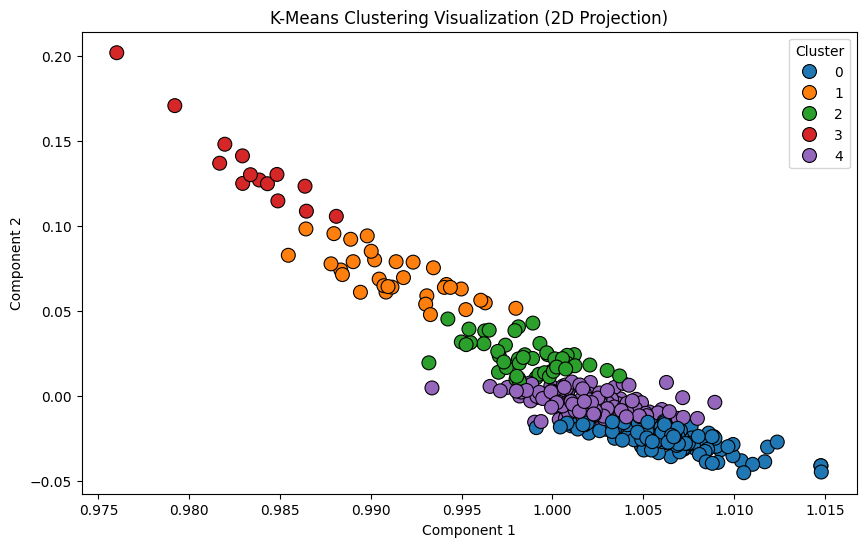

2025-03-09 17:50:40,459 : INFO : collecting all words and their counts
2025-03-09 17:50:40,461 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:40,463 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:40,467 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:40,469 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:40,471 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:40.471793', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:40,472 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:40 

Finished executing at: 2025-03-09 17:50:40 

Executed at: 2025-03-09 17:50:40 



2025-03-09 17:50:40,677 : INFO : EPOCH 3: training on 24723 raw words (4748 effective words) took 0.0s, 145861 effective words/s
2025-03-09 17:50:40,721 : INFO : EPOCH 4: training on 24723 raw words (4703 effective words) took 0.0s, 147306 effective words/s
2025-03-09 17:50:40,770 : INFO : EPOCH 5: training on 24723 raw words (4732 effective words) took 0.0s, 117398 effective words/s
2025-03-09 17:50:40,815 : INFO : EPOCH 6: training on 24723 raw words (4686 effective words) took 0.0s, 122726 effective words/s
2025-03-09 17:50:40,857 : INFO : EPOCH 7: training on 24723 raw words (4645 effective words) took 0.0s, 130800 effective words/s
2025-03-09 17:50:40,901 : INFO : EPOCH 8: training on 24723 raw words (4635 effective words) took 0.0s, 124264 effective words/s
2025-03-09 17:50:40,952 : INFO : EPOCH 9: training on 24723 raw words (4676 effective words) took 0.0s, 104779 effective words/s
2025-03-09 17:50:40,954 : INFO : Word2Vec lifecycle event {'msg': 'training on 247230 raw words (

sg=1, Vector_Size=400, Window=15, Epoch=10
Finished displaying at: 2025-03-09 17:50:41 

Executing 5 start time: 2025-03-09 17:50:41
K=5: Silhouette Score and WSS=0.2380	0.2336

Cluster 0:
- PIA financial closure deadline shortened by 4 months
- Babar Azam breaks Virat Kohli's another record
- No prison for Imran’s sisters; Swati ‘found involved’ in May 9 cases
- Senate panel advances nomination of Kash Patel as FBI director pick
- Balochistan CM announces Pink scooties, electric bikes scheme

Cluster 1:
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- Druski roasted by NBA fans for bold 2025 All-Star game stat predictions and lack of defense
- Maryam says Rs120b allocated for Suthra Punjab Programme
- India expects $200 million missile deal with Philippines this year, sources say

Cluster 2:
- AsiaPak, Montage Oil bid for 75% of Lotte Chemical
- PAF’s JF-17 to perform at Champions Trophy

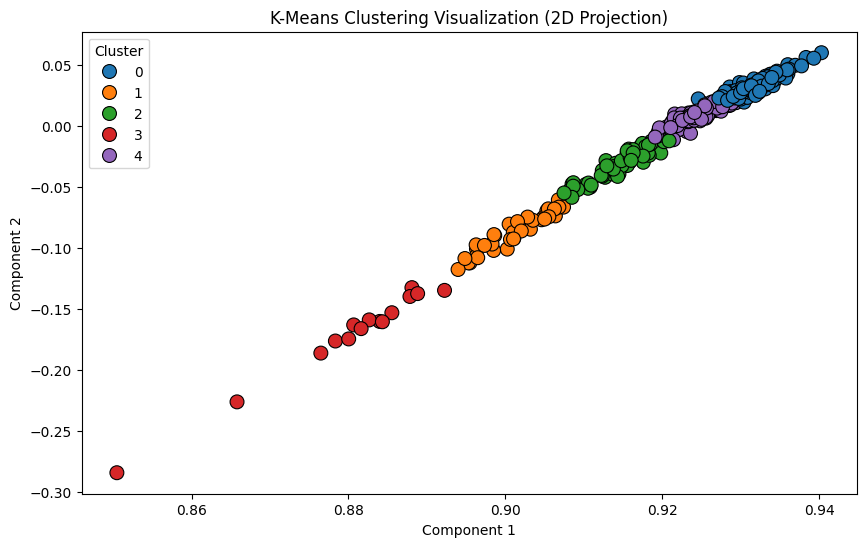

2025-03-09 17:50:41,322 : INFO : collecting all words and their counts
2025-03-09 17:50:41,323 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:41,324 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:41,328 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:41,329 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:41,330 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:41.330611', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:41,331 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:41 

Finished executing at: 2025-03-09 17:50:41 

Executed at: 2025-03-09 17:50:41 



2025-03-09 17:50:41,530 : INFO : EPOCH 3: training on 24723 raw words (4668 effective words) took 0.0s, 96591 effective words/s
2025-03-09 17:50:41,581 : INFO : EPOCH 4: training on 24723 raw words (4751 effective words) took 0.0s, 132380 effective words/s
2025-03-09 17:50:41,630 : INFO : EPOCH 5: training on 24723 raw words (4732 effective words) took 0.0s, 121736 effective words/s
2025-03-09 17:50:41,680 : INFO : EPOCH 6: training on 24723 raw words (4779 effective words) took 0.0s, 115986 effective words/s
2025-03-09 17:50:41,715 : INFO : EPOCH 7: training on 24723 raw words (4602 effective words) took 0.0s, 155711 effective words/s
2025-03-09 17:50:41,751 : INFO : EPOCH 8: training on 24723 raw words (4715 effective words) took 0.0s, 151759 effective words/s
2025-03-09 17:50:41,786 : INFO : EPOCH 9: training on 24723 raw words (4792 effective words) took 0.0s, 154466 effective words/s
2025-03-09 17:50:41,818 : INFO : EPOCH 10: training on 24723 raw words (4603 effective words) took

sg=1, Vector_Size=400, Window=15, Epoch=15
Finished displaying at: 2025-03-09 17:50:41 

Executing 5 start time: 2025-03-09 17:50:41
K=5: Silhouette Score and WSS=0.1714	0.5140

Cluster 0:
- Economic indicators showing positive trends, says Khurram Schehzad
- We will never allow Fitna al-Khawarij to impose their outdated ideology on country: COAS
- Bid to desecrate Holy Quran foiled outside Turkish Consulate in London
- Leonardo DiCaprio’s ex Bar Refaeli's Valentine’s Day lingerie shoot goes viral
- Kinnaird College, PMAA equip young women with self-defense skills

Cluster 1:
- Pakistan Air Force fighter Jets to kick off ICC Champions Trophy 2025 in Style
- Elahi’s plea: AC reserves verdict till 27th
- Over 500 million devotees take 'holy dip' at Maha Kumbh Mela in India
- Kanye West's $250K sex tape scandal resurfaces amid Bianca Censori divorce rumors
- Bank Alfalah strengthens Qist Bazaar with Rs55m equity and Rs460m credit facility to fuel its expansion

Cluster 2:
- Mariyam Nafees

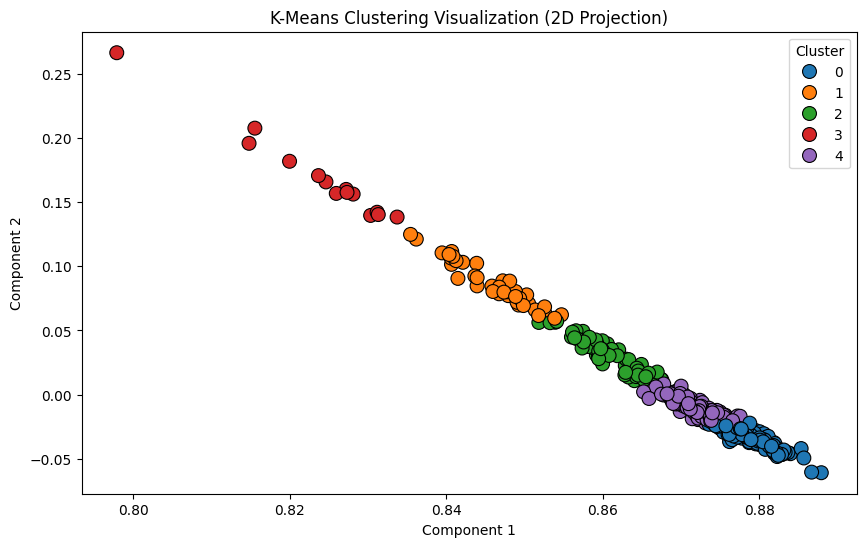

2025-03-09 17:50:42,249 : INFO : collecting all words and their counts
2025-03-09 17:50:42,251 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:42,252 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:42,258 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:42,260 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:42,261 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:42.261338', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:42,263 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:42 

Finished executing at: 2025-03-09 17:50:42 

Executed at: 2025-03-09 17:50:42 



2025-03-09 17:50:42,497 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 134790 effective words/s
2025-03-09 17:50:42,535 : INFO : EPOCH 5: training on 24723 raw words (4690 effective words) took 0.0s, 141904 effective words/s
2025-03-09 17:50:42,574 : INFO : EPOCH 6: training on 24723 raw words (4620 effective words) took 0.0s, 136441 effective words/s
2025-03-09 17:50:42,615 : INFO : EPOCH 7: training on 24723 raw words (4677 effective words) took 0.0s, 138022 effective words/s
2025-03-09 17:50:42,656 : INFO : EPOCH 8: training on 24723 raw words (4678 effective words) took 0.0s, 135928 effective words/s
2025-03-09 17:50:42,695 : INFO : EPOCH 9: training on 24723 raw words (4556 effective words) took 0.0s, 145643 effective words/s
2025-03-09 17:50:42,732 : INFO : EPOCH 10: training on 24723 raw words (4756 effective words) took 0.0s, 153563 effective words/s
2025-03-09 17:50:42,766 : INFO : EPOCH 11: training on 24723 raw words (4642 effective words) to

sg=1, Vector_Size=400, Window=15, Epoch=20
Finished displaying at: 2025-03-09 17:50:43 

Executing 5 start time: 2025-03-09 17:50:43
K=5: Silhouette Score and WSS=0.2127	0.5690

Cluster 0:
- Couple remanded in Rawalpindi minor maid’s murder case
- Govt merges aviation ministry into defence, narcotics control into interior under rightsizing plan
- Hubco expands into EV charging sector with new subsidiary, partners with PSO
- Lawyer admits PTI’s decision to support military courts was wrong
- Apple selects Alibaba for AI integration in China iPhones

Cluster 1:
- 28 injured in car ramming attack in Munich
- Pakistan, Turkey forge historic partnership with 24 Landmark Deals
- 7 Beauty Secrets Celebrities Swear By (And How You Can Steal Them!)
- Facebook demands confirmation from page operators on content for children under 13
- Page World Economy and Politics News Page 5

Cluster 2:
- JUI-F chief stands with journalists against PECA law
- Playgrounds come alive again with Brazil school ph

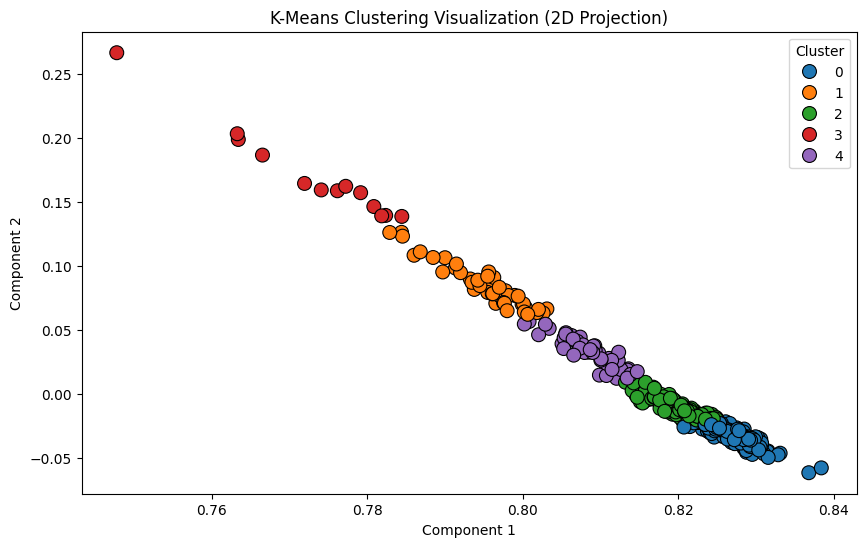

2025-03-09 17:50:43,396 : INFO : collecting all words and their counts
2025-03-09 17:50:43,399 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:43,400 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:43,403 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:43,404 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:43,405 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:43.404142', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:43,406 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:43 

Finished executing at: 2025-03-09 17:50:43 

Executed at: 2025-03-09 17:50:43 



2025-03-09 17:50:43,610 : INFO : EPOCH 4: training on 24723 raw words (4724 effective words) took 0.0s, 159085 effective words/s
2025-03-09 17:50:43,638 : INFO : EPOCH 5: training on 24723 raw words (4670 effective words) took 0.0s, 187984 effective words/s
2025-03-09 17:50:43,673 : INFO : EPOCH 6: training on 24723 raw words (4642 effective words) took 0.0s, 166587 effective words/s
2025-03-09 17:50:43,709 : INFO : EPOCH 7: training on 24723 raw words (4747 effective words) took 0.0s, 171042 effective words/s
2025-03-09 17:50:43,741 : INFO : EPOCH 8: training on 24723 raw words (4684 effective words) took 0.0s, 166509 effective words/s
2025-03-09 17:50:43,770 : INFO : EPOCH 9: training on 24723 raw words (4581 effective words) took 0.0s, 180254 effective words/s
2025-03-09 17:50:43,802 : INFO : EPOCH 10: training on 24723 raw words (4641 effective words) took 0.0s, 191816 effective words/s
2025-03-09 17:50:43,836 : INFO : EPOCH 11: training on 24723 raw words (4758 effective words) to

sg=1, Vector_Size=400, Window=15, Epoch=25
Finished displaying at: 2025-03-09 17:50:44 

Executing 5 start time: 2025-03-09 17:50:44
K=5: Silhouette Score and WSS=0.1512	0.7779

Cluster 0:
- Everyone can’t go to jail to meet Imran: IHC CJ
- Minister takes notice of difficulties in Umrah vaccination, orders more counters
- IK urges army chief to revisit policies in ‘best national interest’
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance

Cluster 1:
- Challenges hinder Gwadar Port’s full-scale operations despite incentives: report
- CM Maryam announces 3-marla plots for homeless people
- PSG president Nasser Al-Khelaïfi indicted in Lagardère investigation
- Pope Francis, 88, admitted for bronchitis treatment after struggling to speak
- Thousands of patients treated at PIMS OPD in evening hours

Cluster 2:
- Gold price soars by Rs2,500 per tola
- Solar panel imports: 8

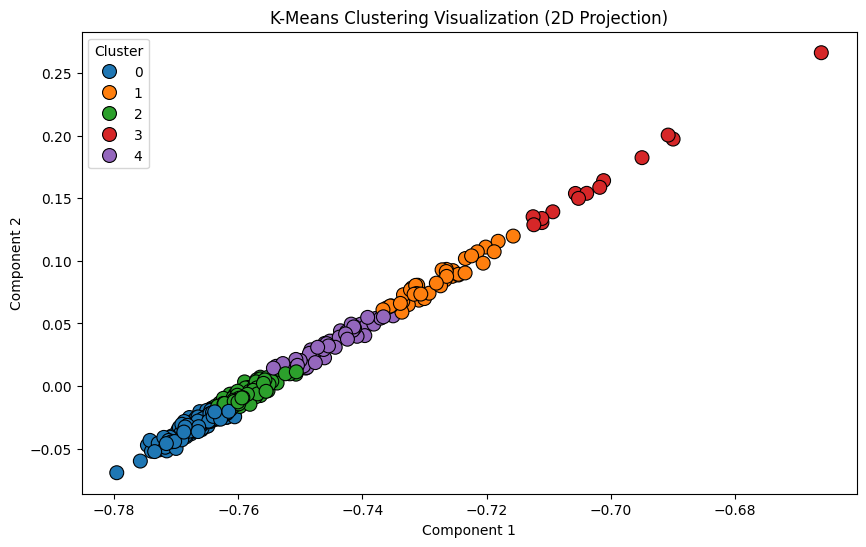

2025-03-09 17:50:44,581 : INFO : collecting all words and their counts
2025-03-09 17:50:44,582 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:44,583 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:44,586 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:44,587 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:44,588 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:44.588561', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:44,589 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:44 

Finished executing at: 2025-03-09 17:50:44 

Executed at: 2025-03-09 17:50:44 



2025-03-09 17:50:44,803 : INFO : EPOCH 6: training on 24723 raw words (4660 effective words) took 0.0s, 188173 effective words/s
2025-03-09 17:50:44,833 : INFO : EPOCH 7: training on 24723 raw words (4735 effective words) took 0.0s, 204286 effective words/s
2025-03-09 17:50:44,862 : INFO : EPOCH 8: training on 24723 raw words (4694 effective words) took 0.0s, 184163 effective words/s
2025-03-09 17:50:44,893 : INFO : EPOCH 9: training on 24723 raw words (4744 effective words) took 0.0s, 213418 effective words/s
2025-03-09 17:50:44,921 : INFO : EPOCH 10: training on 24723 raw words (4684 effective words) took 0.0s, 198538 effective words/s
2025-03-09 17:50:44,951 : INFO : EPOCH 11: training on 24723 raw words (4632 effective words) took 0.0s, 176444 effective words/s
2025-03-09 17:50:44,980 : INFO : EPOCH 12: training on 24723 raw words (4709 effective words) took 0.0s, 184377 effective words/s
2025-03-09 17:50:45,012 : INFO : EPOCH 13: training on 24723 raw words (4662 effective words) 

sg=1, Vector_Size=400, Window=15, Epoch=30
Finished displaying at: 2025-03-09 17:50:45 

Executing 5 start time: 2025-03-09 17:50:45
K=5: Silhouette Score and WSS=0.1302	0.8933

Cluster 0:
- Apple’s App Tracking Transparency tool under scrutiny in Germany
- Turkish President Erdogan reaches PM House for talks with Shehbaz Sharif
- Harsher penalties for forced begging in Punjab
- Ahmer honored for contributions to squash at K2 Squash Gold Event
- Musk threatens to withdraw $97B OpenAI bid unless nonprofit shift stops

Cluster 1:
- Harassment experiences in Pakistan: the need to speak up
- PSW CEO meets delegation led by Galaxefi CEO
- DeepSeek gives China’s chipmakers leg up in race for cheaper AI
- Google partners with Poland to expand AI adoption in key sectors
- ‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network

Cluster 2:
- Over 16,000 School Teacher Jobs 2025 – Here’s all you need to know
- Champions Trophy 2025: squads, groups and schedule
- UK Pound further climbs up a

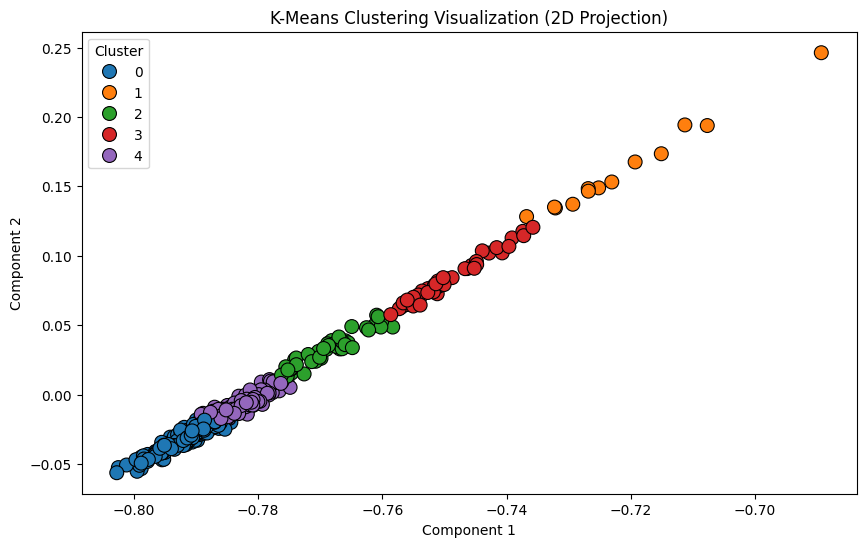

Finished displaying at: 2025-03-09 17:50:46 

Finished executing at: 2025-03-09 17:50:46 



In [1054]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 17:50:46,357 : INFO : collecting all words and their counts
2025-03-09 17:50:46,359 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:46,360 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:46,365 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:46,366 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:46,368 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:46.368949', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:46,370 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 17:50:46 



2025-03-09 17:50:46,600 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 103808 effective words/s
2025-03-09 17:50:46,650 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 104925 effective words/s
2025-03-09 17:50:46,651 : INFO : Word2Vec lifecycle event {'msg': 'training on 123615 raw words (23518 effective words) took 0.3s, 91563 effective words/s', 'datetime': '2025-03-09T17:50:46.651832', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 17:50:46,651 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=38, vector_size=400, alpha=0.025>', 'datetime': '2025-03-09T17:50:46.651832', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'created'}


sg=1, Vector_Size=400, Window=15, Epoch=5
Finished displaying at: 2025-03-09 17:50:46 

Executing 9 start time: 2025-03-09 17:50:46
K=9: Silhouette Score and WSS=0.2233	0.0470

Cluster 0:
- Gazans return to ruined homes and severe water shortage
- Key takeaways ahead of Pakistan's tri-series final against New Zealand
- Australia’s Johnson sees chance to shine while ‘Big Three’ quicks away
- Pakistan prioritizes circular economy to boost sustainability, waste management: Romina
- Aurangzeb discusses Pakistan’s structural reforms with IFC chief

Cluster 1:
- UAE is offering 10-Year Visa; Guide for Pakistanis to apply in 2025
- Israeli military killed 85 journalists in 2024: CPJ
- Champions Trophy 2025: squads, groups and schedule
- Second polio case of 2025 reported from Badin
- Pakistan’s 2nd polio case of 2025 reported in Badin

Cluster 2:
- Police charge couple with murder of child maid
- Passing-out parade of 35th FC course held in Warsak
- Social media reacts to Paul George scoring 

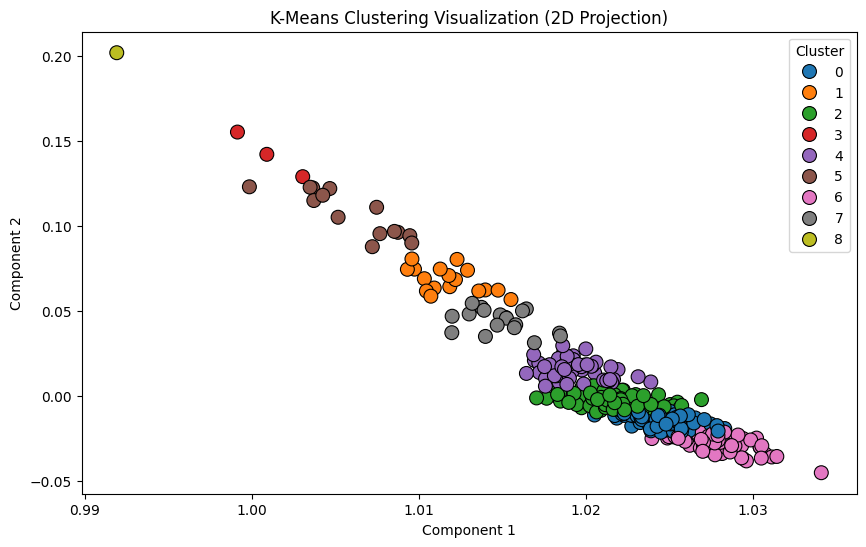

2025-03-09 17:50:47,108 : INFO : collecting all words and their counts
2025-03-09 17:50:47,109 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:47,110 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:47,125 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:47,127 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:47,131 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:47.131211', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:47,137 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:47 

Finished executing at: 2025-03-09 17:50:47 

Executed at: 2025-03-09 17:50:47 



2025-03-09 17:50:47,350 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.0s, 94142 effective words/s
2025-03-09 17:50:47,402 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 112846 effective words/s
2025-03-09 17:50:47,459 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.1s, 93555 effective words/s
2025-03-09 17:50:47,512 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.0s, 101410 effective words/s
2025-03-09 17:50:47,570 : INFO : EPOCH 6: training on 24723 raw words (4578 effective words) took 0.1s, 90939 effective words/s
2025-03-09 17:50:47,624 : INFO : EPOCH 7: training on 24723 raw words (4580 effective words) took 0.0s, 97402 effective words/s
2025-03-09 17:50:47,681 : INFO : EPOCH 8: training on 24723 raw words (4780 effective words) took 0.1s, 93764 effective words/s
2025-03-09 17:50:47,736 : INFO : EPOCH 9: training on 24723 raw words (4603 effective words) took 0.0s

sg=1, Vector_Size=400, Window=15, Epoch=10
Finished displaying at: 2025-03-09 17:50:47 

Executing 9 start time: 2025-03-09 17:50:47
K=9: Silhouette Score and WSS=0.1746	0.1702

Cluster 0:
- PM thanks President Erdogan for visiting Pakistan
- Pakistan’s greatest ODI chases: A look back after historic win over South Africa
- Pesticides causing widespread harm to animals and plants: study
- Rupee records marginal improvement against US dollar
- Croatia laughter museum aims to blow away blues

Cluster 1:
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- IMF’s 2024 Article IV report, and debate on inflation—I
- Pakistan CPI 2024 – deep-rooted corruption persists
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR

Cluster 2:
- US, India strike deal for F-35 stealth fighter jets amid growing defense ties
- From Napa to Rada: Actor Hani Taha’s journey to the world’s premier dra

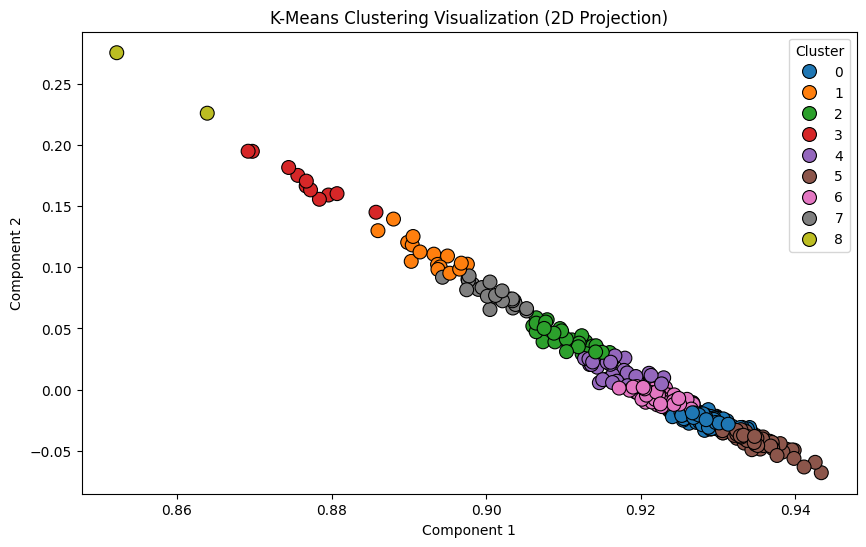

2025-03-09 17:50:48,202 : INFO : collecting all words and their counts
2025-03-09 17:50:48,209 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:48,211 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:48,219 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:48,220 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:48,222 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:48.222450', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:48,223 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:48 

Finished executing at: 2025-03-09 17:50:48 

Executed at: 2025-03-09 17:50:48 



2025-03-09 17:50:48,403 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.0s, 106272 effective words/s
2025-03-09 17:50:48,459 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 98304 effective words/s
2025-03-09 17:50:48,514 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 98564 effective words/s
2025-03-09 17:50:48,571 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.0s, 95830 effective words/s
2025-03-09 17:50:48,632 : INFO : EPOCH 6: training on 24723 raw words (4624 effective words) took 0.0s, 93496 effective words/s
2025-03-09 17:50:48,690 : INFO : EPOCH 7: training on 24723 raw words (4783 effective words) took 0.1s, 92100 effective words/s
2025-03-09 17:50:48,751 : INFO : EPOCH 8: training on 24723 raw words (4619 effective words) took 0.0s, 93363 effective words/s
2025-03-09 17:50:48,830 : INFO : EPOCH 9: training on 24723 raw words (4687 effective words) took 0.1s,

sg=1, Vector_Size=400, Window=15, Epoch=15
Finished displaying at: 2025-03-09 17:50:49 

Executing 9 start time: 2025-03-09 17:50:49
K=9: Silhouette Score and WSS=0.1516	0.3539

Cluster 0:
- Catherine Zeta-Jones to star in revenge thriller series Kill Jackie based on Nick Harkaway's novel
- Rawalpindi police arrest primary suspect in college student ‘honour’ killing case
- Ishaq Dar to visit USA for UNSC meeting
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival
- Senate pays rich tributes to Prince Karim Aga Khan

Cluster 1:
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- Top global funds turn to Pakistan as 84% stock rally set to continue: Bloomberg
- Deadly blast in Harnai kills 11 coal miners, injures four
- Ahmer honored for contributions to squash at K2 Squash Gold Event
- Pakistan Refinery says will shut down plant for ‘approximately 6 days’

Cluster 2:
- Pakistan on new journey towards stability, prosperity, says Rana Mashhood
- Imran’s atte

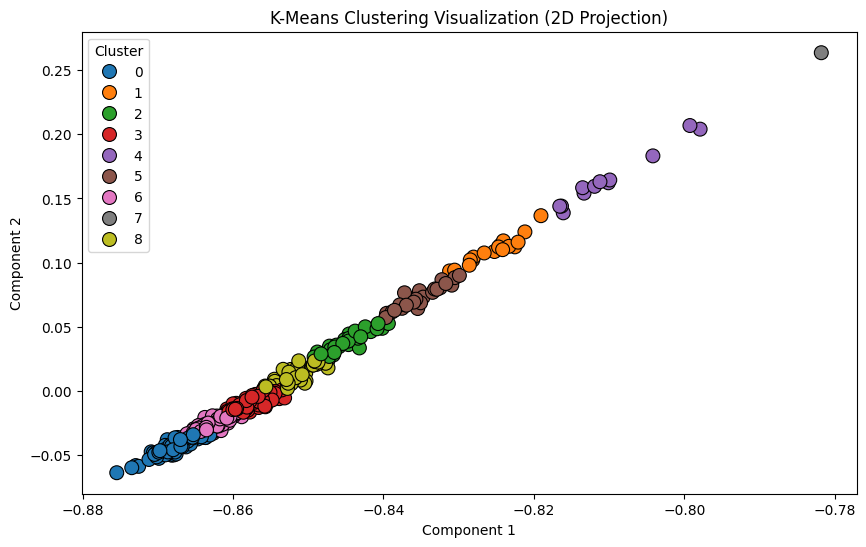

2025-03-09 17:50:49,759 : INFO : collecting all words and their counts
2025-03-09 17:50:49,760 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:49,762 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:49,768 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:49,772 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:49,774 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:49.774644', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:49,776 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:49 

Finished executing at: 2025-03-09 17:50:49 

Executed at: 2025-03-09 17:50:49 



2025-03-09 17:50:50,000 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 128326 effective words/s
2025-03-09 17:50:50,053 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 101990 effective words/s
2025-03-09 17:50:50,105 : INFO : EPOCH 5: training on 24723 raw words (4683 effective words) took 0.0s, 105183 effective words/s
2025-03-09 17:50:50,152 : INFO : EPOCH 6: training on 24723 raw words (4578 effective words) took 0.0s, 108131 effective words/s
2025-03-09 17:50:50,195 : INFO : EPOCH 7: training on 24723 raw words (4580 effective words) took 0.0s, 128382 effective words/s
2025-03-09 17:50:50,240 : INFO : EPOCH 8: training on 24723 raw words (4780 effective words) took 0.0s, 123432 effective words/s
2025-03-09 17:50:50,378 : INFO : EPOCH 9: training on 24723 raw words (4586 effective words) took 0.1s, 34962 effective words/s
2025-03-09 17:50:50,456 : INFO : EPOCH 10: training on 24723 raw words (4738 effective words) took

sg=1, Vector_Size=400, Window=15, Epoch=20
Finished displaying at: 2025-03-09 17:50:50 

Executing 9 start time: 2025-03-09 17:50:50
K=9: Silhouette Score and WSS=0.1323	0.5300

Cluster 0:
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Ahmer honored for contributions to squash at K2 Squash Gold Event
- Economist Stiglitz urges tariffs on Trump’s ‘dysfunctional’ admin
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- Deepika Padukone talks exam stress, mental health
- Power of AI brings Urdu books to life
- Did Elon Musk’s son really tell Trump to 'shush your f***ing mouth up' in the Oval Office?
- US Attorney General Pam Bondi files lawsuit against New York's immigration law
- ‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network

Cluster 2:
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- Islamabad’s Zones 2, 4, and 5

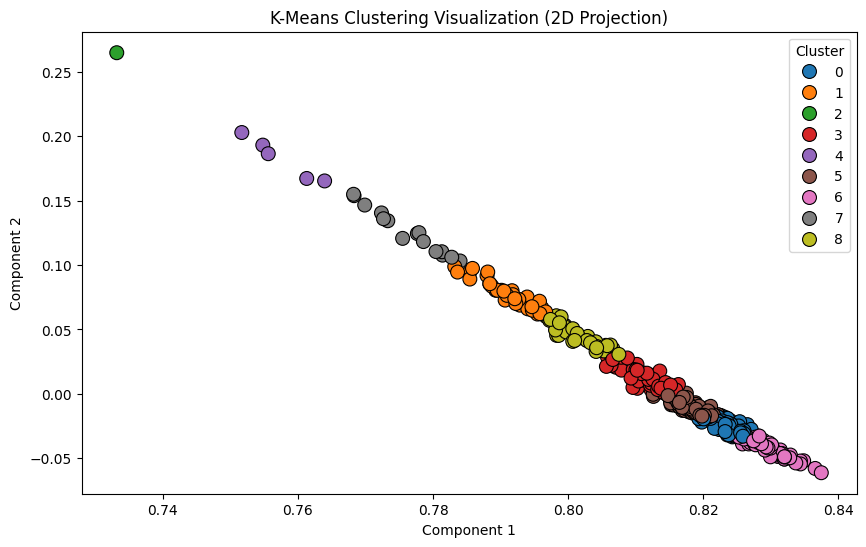

2025-03-09 17:50:51,433 : INFO : collecting all words and their counts
2025-03-09 17:50:51,434 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:51,435 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:51,441 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:51,442 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:51,444 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:51.444929', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:51,448 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:51 

Finished executing at: 2025-03-09 17:50:51 

Executed at: 2025-03-09 17:50:51 



2025-03-09 17:50:51,676 : INFO : EPOCH 3: training on 24723 raw words (4727 effective words) took 0.0s, 112348 effective words/s
2025-03-09 17:50:51,729 : INFO : EPOCH 4: training on 24723 raw words (4702 effective words) took 0.0s, 103239 effective words/s
2025-03-09 17:50:51,786 : INFO : EPOCH 5: training on 24723 raw words (4699 effective words) took 0.0s, 98129 effective words/s
2025-03-09 17:50:51,839 : INFO : EPOCH 6: training on 24723 raw words (4716 effective words) took 0.0s, 103544 effective words/s
2025-03-09 17:50:51,894 : INFO : EPOCH 7: training on 24723 raw words (4664 effective words) took 0.0s, 95039 effective words/s
2025-03-09 17:50:51,950 : INFO : EPOCH 8: training on 24723 raw words (4719 effective words) took 0.0s, 97127 effective words/s
2025-03-09 17:50:52,003 : INFO : EPOCH 9: training on 24723 raw words (4655 effective words) took 0.0s, 99581 effective words/s
2025-03-09 17:50:52,058 : INFO : EPOCH 10: training on 24723 raw words (4661 effective words) took 0.

sg=1, Vector_Size=400, Window=15, Epoch=25
Finished displaying at: 2025-03-09 17:50:52 

Executing 9 start time: 2025-03-09 17:50:52
K=9: Silhouette Score and WSS=0.1131	0.6190

Cluster 0:
- "Not my King': Anti-monarchy protesters chant at King Charles during visit to Middlesbrough
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries
- Everyone can’t go to jail to meet Imran: IHC CJ
- 'Cobra Kai' stars Tanner Buchanan and Mary Mouser confirm relationship, spark engagement rumours
- Europe warns Trump against Ukraine deal ‘behind our backs’

Cluster 1:
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Govt hikes RLNG prices by up to 1.86pc
- SBP reserves fall $500m in less than a month | Dawn News English
- Pakistan CPI 2024 – deep-rooted corruption persists
- Bank Alfalah strengthens Qist Bazaar with Rs55m equity and Rs460m credit facility to fuel its expansion

Cluster 2:
- Workshop stresses for shaping equitable, sustainab

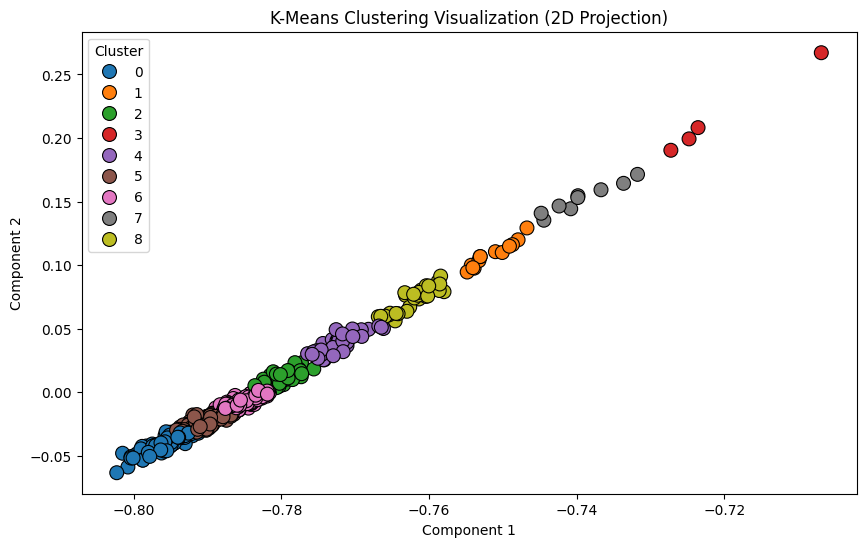

2025-03-09 17:50:53,411 : INFO : collecting all words and their counts
2025-03-09 17:50:53,412 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:53,414 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:53,419 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:53,421 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:53,424 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:53.423811', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:53,425 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:53 

Finished executing at: 2025-03-09 17:50:53 

Executed at: 2025-03-09 17:50:53 



2025-03-09 17:50:53,683 : INFO : EPOCH 1: training on 24723 raw words (4679 effective words) took 0.1s, 40791 effective words/s
2025-03-09 17:50:53,776 : INFO : EPOCH 2: training on 24723 raw words (4694 effective words) took 0.1s, 59534 effective words/s
2025-03-09 17:50:53,867 : INFO : EPOCH 3: training on 24723 raw words (4715 effective words) took 0.1s, 63443 effective words/s
2025-03-09 17:50:53,938 : INFO : EPOCH 4: training on 24723 raw words (4671 effective words) took 0.1s, 80922 effective words/s
2025-03-09 17:50:54,014 : INFO : EPOCH 5: training on 24723 raw words (4630 effective words) took 0.1s, 67781 effective words/s
2025-03-09 17:50:54,105 : INFO : EPOCH 6: training on 24723 raw words (4553 effective words) took 0.1s, 56076 effective words/s
2025-03-09 17:50:54,231 : INFO : EPOCH 7: training on 24723 raw words (4723 effective words) took 0.1s, 44107 effective words/s
2025-03-09 17:50:54,346 : INFO : EPOCH 8: training on 24723 raw words (4618 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=30
Finished displaying at: 2025-03-09 17:50:55 

Executing 9 start time: 2025-03-09 17:50:55
K=9: Silhouette Score and WSS=0.1228	0.7290

Cluster 0:
- Babar Azam urges fans to drop 'King' title, highlights team focus
- Babar Azam on verge of breaking multiple records against New Zealand
- Ohio State Buckeyes faces quarterback battle, adds Matt Patricia as DC
- Australia’s Johnson sees chance to shine while ‘Big Three’ quicks away
- Babar Azam breaks Virat Kohli's another record

Cluster 1:
- PM condemns Harnai blast, vows action against culprits
- CJP Afridi administers oath to newly-appointed SC judges
- Justin Bieber’s comment on Keke Palmer’s post raises eyebrows amid Hailey Bieber divorce rumors
- Alligators, raccoons, and more thrive in urban sewer systems
- Jeffrey Sachs: Trump's tariff policy bound to fail

Cluster 2:
- India seen seeking global bids this year for 114 fighters
- KSE-100 closes 479 points lower as late-session selling erase

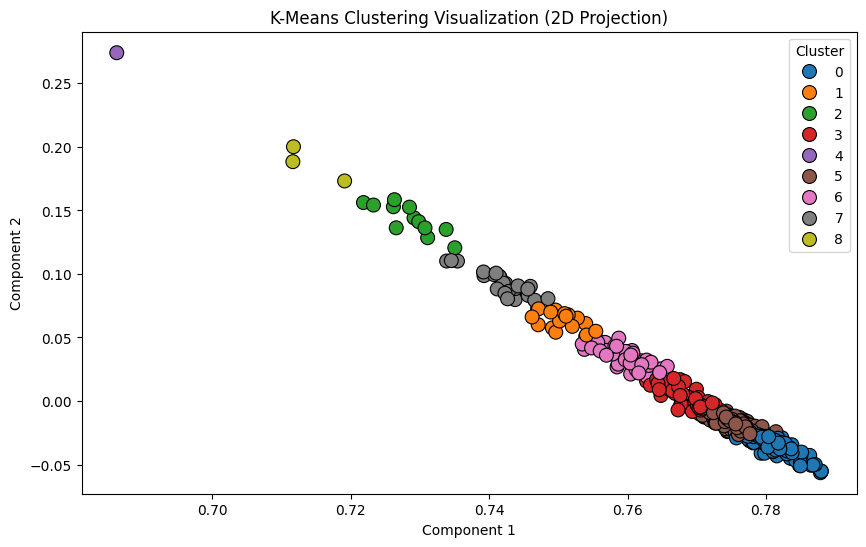

Finished displaying at: 2025-03-09 17:50:56 

Finished executing at: 2025-03-09 17:50:56 



In [1055]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 17:50:56,412 : INFO : collecting all words and their counts
2025-03-09 17:50:56,415 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:56,416 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:56,423 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:56,425 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:56,428 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:56.428408', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:56,430 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 17:50:56 



2025-03-09 17:50:56,659 : INFO : EPOCH 2: training on 24723 raw words (4591 effective words) took 0.1s, 79956 effective words/s
2025-03-09 17:50:56,729 : INFO : EPOCH 3: training on 24723 raw words (4656 effective words) took 0.1s, 76900 effective words/s
2025-03-09 17:50:56,797 : INFO : EPOCH 4: training on 24723 raw words (4665 effective words) took 0.1s, 79640 effective words/s
2025-03-09 17:50:56,799 : INFO : Word2Vec lifecycle event {'msg': 'training on 123615 raw words (23282 effective words) took 0.3s, 67992 effective words/s', 'datetime': '2025-03-09T17:50:56.799573', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'train'}
2025-03-09 17:50:56,801 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=38, vector_size=400, alpha=0.025>', 'datetime': '2025-03-09T17:50:56.801576', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58)

sg=1, Vector_Size=400, Window=15, Epoch=5
Finished displaying at: 2025-03-09 17:50:56 

Executing 13 start time: 2025-03-09 17:50:56
K=13: Silhouette Score and WSS=0.1893	0.0357

Cluster 0:
- Karachi administration revises timings for movement of heavy vehicles
- Climate change takes centre stage at spring art festival
- Mehwish Hayat is All Set to Return to Our Television Screens After 7 Years!
- The rise of a larger but weaker judiciary?
- Fitness certificate made mandatory for all vehicles

Cluster 1:
- Star Grammar School among 69 buildings sealed in Lahore
- 28 injured in car ramming attack in Munich
- Kanye West's $250K sex tape scandal resurfaces amid Bianca Censori divorce rumors
- Pakistan, Turkey forge historic partnership with 24 Landmark Deals
- Babar Azam: King no more, stats tell the struggling tale

Cluster 2:
- Israeli military killed 85 journalists in 2024: CPJ
- Pakistan’s external debt servicing jumps to $4.2 billion in Q2-FY25
- Champions Trophy 2025: squads, groups

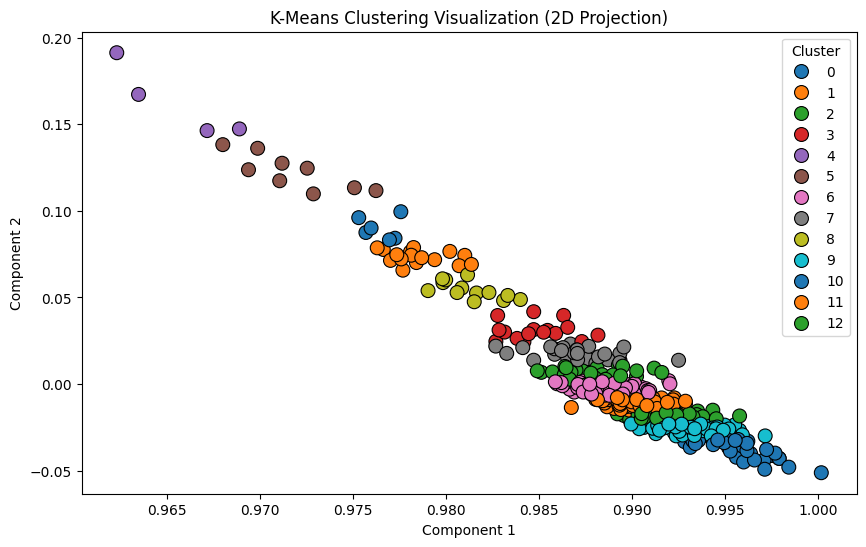

2025-03-09 17:50:57,563 : INFO : collecting all words and their counts
2025-03-09 17:50:57,565 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:57,566 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:57,574 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:57,575 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:57,577 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:57.577385', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:57,579 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:57 

Finished executing at: 2025-03-09 17:50:57 

Executed at: 2025-03-09 17:50:57 



2025-03-09 17:50:57,799 : INFO : EPOCH 2: training on 24723 raw words (4684 effective words) took 0.1s, 89906 effective words/s
2025-03-09 17:50:57,868 : INFO : EPOCH 3: training on 24723 raw words (4744 effective words) took 0.1s, 78676 effective words/s
2025-03-09 17:50:57,942 : INFO : EPOCH 4: training on 24723 raw words (4693 effective words) took 0.1s, 72306 effective words/s
2025-03-09 17:50:58,015 : INFO : EPOCH 5: training on 24723 raw words (4720 effective words) took 0.1s, 74634 effective words/s
2025-03-09 17:50:58,088 : INFO : EPOCH 6: training on 24723 raw words (4626 effective words) took 0.1s, 75570 effective words/s
2025-03-09 17:50:58,162 : INFO : EPOCH 7: training on 24723 raw words (4697 effective words) took 0.1s, 71802 effective words/s
2025-03-09 17:50:58,230 : INFO : EPOCH 8: training on 24723 raw words (4685 effective words) took 0.1s, 79464 effective words/s
2025-03-09 17:50:58,293 : INFO : EPOCH 9: training on 24723 raw words (4707 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=10
Finished displaying at: 2025-03-09 17:50:58 

Executing 13 start time: 2025-03-09 17:50:58
K=13: Silhouette Score and WSS=0.1534	0.1689

Cluster 0:
- Injuries disrupted England’s training during India ODI series: McCullum
- DeepSeek dilemma: Why is the Chinese AI app facing global backlash?
- Pakistan, Kiwis set for high-stakes final at National Bank Stadium
- Gold prices see another rise to reach record highs in Pakistan
- Australia thrashed as Sri Lanka sweep ODI series

Cluster 1:
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Pakistan CPI 2024 – deep-rooted corruption persists
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- Solar panel imports: 80 companies transferred around Rs106bn abroad: FBR
- Journalist killings reach record high in 2024

Cluster 2:
- Blast at coal mine in Harnai claims 9 lives, leaves 6 injured
- India seen seeking global bids this year for 114 fighters
- Sri Lan

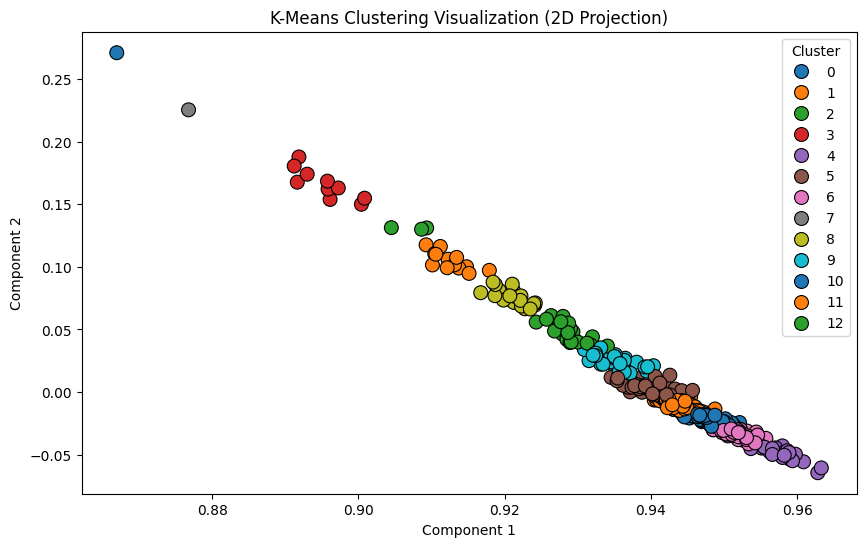

2025-03-09 17:50:59,012 : INFO : collecting all words and their counts
2025-03-09 17:50:59,016 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:50:59,017 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:50:59,026 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:50:59,029 : INFO : Creating a fresh vocabulary
2025-03-09 17:50:59,031 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:50:59.031167', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:50:59,034 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:50:59 

Finished executing at: 2025-03-09 17:50:59 

Executed at: 2025-03-09 17:50:59 



2025-03-09 17:50:59,283 : INFO : EPOCH 1: training on 24723 raw words (4709 effective words) took 0.1s, 39884 effective words/s
2025-03-09 17:50:59,387 : INFO : EPOCH 2: training on 24723 raw words (4688 effective words) took 0.1s, 54408 effective words/s
2025-03-09 17:50:59,469 : INFO : EPOCH 3: training on 24723 raw words (4719 effective words) took 0.1s, 66849 effective words/s
2025-03-09 17:50:59,546 : INFO : EPOCH 4: training on 24723 raw words (4634 effective words) took 0.1s, 67472 effective words/s
2025-03-09 17:50:59,620 : INFO : EPOCH 5: training on 24723 raw words (4681 effective words) took 0.1s, 73537 effective words/s
2025-03-09 17:50:59,693 : INFO : EPOCH 6: training on 24723 raw words (4589 effective words) took 0.1s, 73711 effective words/s
2025-03-09 17:50:59,775 : INFO : EPOCH 7: training on 24723 raw words (4785 effective words) took 0.1s, 68262 effective words/s
2025-03-09 17:50:59,851 : INFO : EPOCH 8: training on 24723 raw words (4688 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=15
Finished displaying at: 2025-03-09 17:51:00 

Executing 13 start time: 2025-03-09 17:51:00
K=13: Silhouette Score and WSS=0.1220	0.3450

Cluster 0:
- Field of education: Pakistan, Kazakhstan for enhancing mutual cooperation
- JUI-F chief stands with journalists against PECA law
- Pakistan defeat South Africa in record chase
- Bano Butt: The Trailblazer changing the face of Women’s MMA in Pakistan
- Saudi Arabia to host Arab summit on Trump’s Gaza plan

Cluster 1:
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- Excellence Over Perfection: Highlights from the ADA Awards 2025
- ICC announces prize money for 2025 Champions Trophy
- JazzCash, Mobilink Bank named finalists for prestigious GLOMO Awards 2025

Cluster 2:
- The Ultimate Guide to Healing Foods: Eat Your Way to Better Health
- Girl found dead, brother rescued after two years of captivi

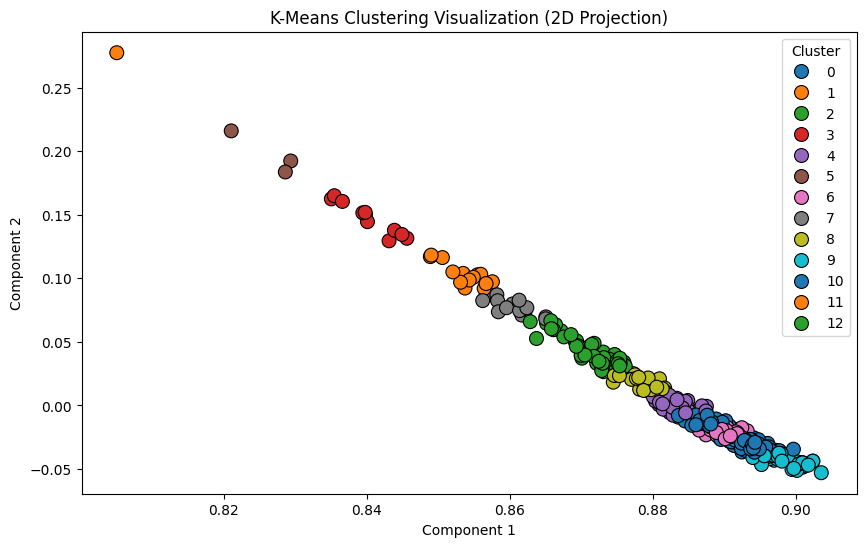

2025-03-09 17:51:00,985 : INFO : collecting all words and their counts
2025-03-09 17:51:00,987 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:51:00,989 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:51:00,996 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:51:00,998 : INFO : Creating a fresh vocabulary
2025-03-09 17:51:01,000 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:51:01.000031', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:51:01,002 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:51:00 

Finished executing at: 2025-03-09 17:51:00 

Executed at: 2025-03-09 17:51:00 



2025-03-09 17:51:01,242 : INFO : EPOCH 2: training on 24723 raw words (4765 effective words) took 0.1s, 70134 effective words/s
2025-03-09 17:51:01,313 : INFO : EPOCH 3: training on 24723 raw words (4646 effective words) took 0.1s, 74079 effective words/s
2025-03-09 17:51:01,388 : INFO : EPOCH 4: training on 24723 raw words (4634 effective words) took 0.1s, 72594 effective words/s
2025-03-09 17:51:01,465 : INFO : EPOCH 5: training on 24723 raw words (4777 effective words) took 0.1s, 71873 effective words/s
2025-03-09 17:51:01,542 : INFO : EPOCH 6: training on 24723 raw words (4678 effective words) took 0.1s, 70066 effective words/s
2025-03-09 17:51:01,621 : INFO : EPOCH 7: training on 24723 raw words (4667 effective words) took 0.1s, 70473 effective words/s
2025-03-09 17:51:01,697 : INFO : EPOCH 8: training on 24723 raw words (4739 effective words) took 0.1s, 72208 effective words/s
2025-03-09 17:51:01,772 : INFO : EPOCH 9: training on 24723 raw words (4601 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=20
Finished displaying at: 2025-03-09 17:51:02 

Executing 13 start time: 2025-03-09 17:51:02
K=13: Silhouette Score and WSS=0.1082	0.4430

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- SALU, Spanish university sign MoU to boost archaeological studies
- Harsher penalties for forced begging in Punjab
- Kinnaird College, PMAA equip young women with self-defense skills
- Aurangzeb highlights increasing risks facing insurance industry

Cluster 1:
- Trail Blazers vs Nuggets 121-132: Jamal Murray has career night for Denver
- More than 500 million take ‘holy dip’ in India’s Maha Kumbh festival
- Umair Jaswal, Hadiqa Kiani, and Shae Gill to headline Lahooti 2025
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to oversee projects
- 394th annual Urs of Hazrat Ishan starts

Cluster 2:
- India’s FX reserves rise to over one-month high on revaluation gains
- Karachi administration revises timings for movement

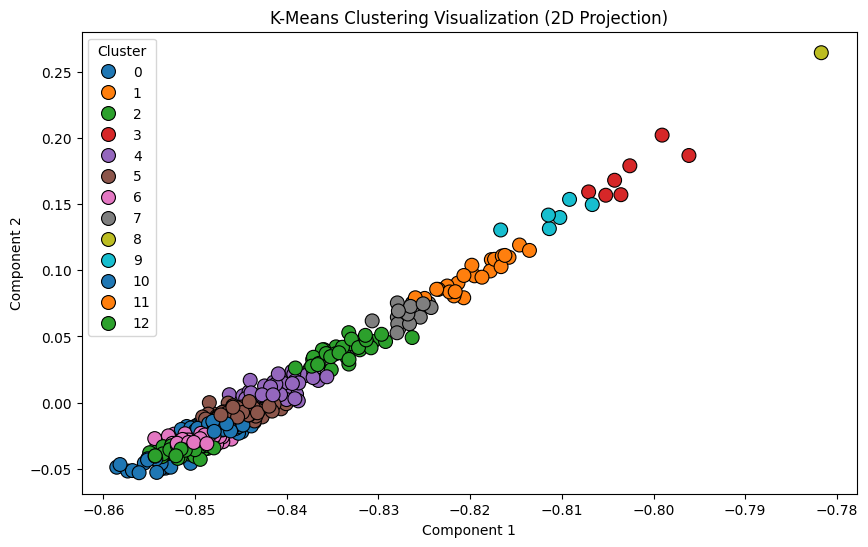

2025-03-09 17:51:03,238 : INFO : collecting all words and their counts
2025-03-09 17:51:03,241 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:51:03,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:51:03,257 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:51:03,260 : INFO : Creating a fresh vocabulary
2025-03-09 17:51:03,267 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:51:03.266656', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:51:03,271 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:51:03 

Finished executing at: 2025-03-09 17:51:03 

Executed at: 2025-03-09 17:51:03 



2025-03-09 17:51:03,425 : INFO : EPOCH 0: training on 24723 raw words (4661 effective words) took 0.1s, 50108 effective words/s
2025-03-09 17:51:03,521 : INFO : EPOCH 1: training on 24723 raw words (4742 effective words) took 0.1s, 84242 effective words/s
2025-03-09 17:51:03,615 : INFO : EPOCH 2: training on 24723 raw words (4684 effective words) took 0.1s, 56719 effective words/s
2025-03-09 17:51:03,688 : INFO : EPOCH 3: training on 24723 raw words (4759 effective words) took 0.1s, 72553 effective words/s
2025-03-09 17:51:03,814 : INFO : EPOCH 4: training on 24723 raw words (4721 effective words) took 0.1s, 40833 effective words/s
2025-03-09 17:51:03,930 : INFO : EPOCH 5: training on 24723 raw words (4744 effective words) took 0.1s, 47089 effective words/s
2025-03-09 17:51:03,987 : INFO : EPOCH 6: training on 24723 raw words (4677 effective words) took 0.0s, 101601 effective words/s
2025-03-09 17:51:04,037 : INFO : EPOCH 7: training on 24723 raw words (4633 effective words) took 0.0s,

sg=1, Vector_Size=400, Window=15, Epoch=25
Finished displaying at: 2025-03-09 17:51:05 

Executing 13 start time: 2025-03-09 17:51:05
K=13: Silhouette Score and WSS=0.0975	0.5490

Cluster 0:
- Babar Azam breaks Virat Kohli's another record
- From Napa to Rada: Actor Hani Taha’s journey to the world’s premier drama school
- Justice Mansoor Ali Shah dismisses reference fears, highlights judiciary’s performance
- William Shatner accuses Mark Hamill of ruining Star Wars
- Watch: Humpback whale swallows kayaker in dramatic Chilean waters encounter

Cluster 1:
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year
- Pakistan on new journey towards stability, prosperity, says Rana Mashhood
- Workshop stresses for shaping equitable, sustainable food systems
- Basketball star Jahki Howard caught sliding into DMs of trans influencer
- Saudi Arabia to host Arab summit on Trump’s Gaza plan

Cluster 2:
- 394th annual Urs of Hazrat Ishan starts
- India seen seek

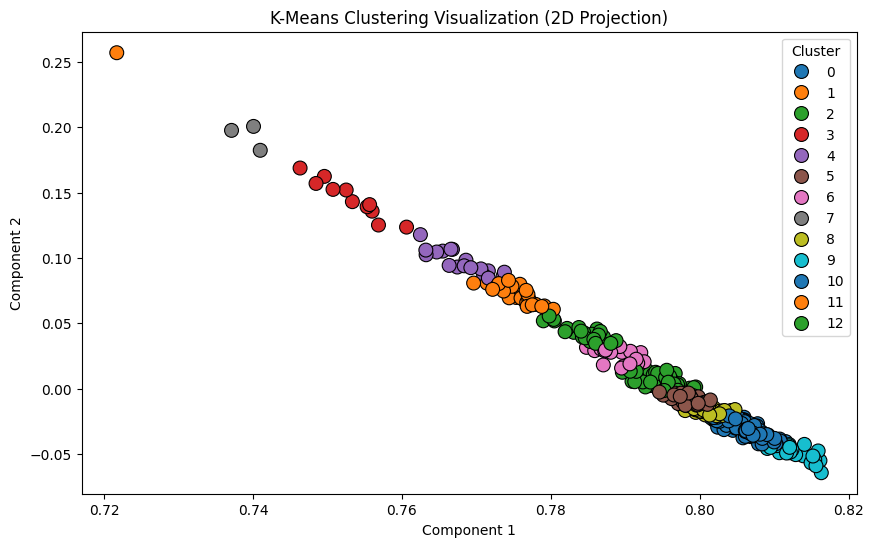

2025-03-09 17:51:05,762 : INFO : collecting all words and their counts
2025-03-09 17:51:05,764 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 17:51:05,765 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 17:51:05,772 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 17:51:05,774 : INFO : Creating a fresh vocabulary
2025-03-09 17:51:05,775 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T17:51:05.775659', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 17:51:05,777 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 17:51:05 

Finished executing at: 2025-03-09 17:51:05 

Executed at: 2025-03-09 17:51:05 



2025-03-09 17:51:05,983 : INFO : EPOCH 2: training on 24723 raw words (4686 effective words) took 0.1s, 91589 effective words/s
2025-03-09 17:51:06,045 : INFO : EPOCH 3: training on 24723 raw words (4747 effective words) took 0.1s, 88737 effective words/s
2025-03-09 17:51:06,102 : INFO : EPOCH 4: training on 24723 raw words (4685 effective words) took 0.1s, 89876 effective words/s
2025-03-09 17:51:06,160 : INFO : EPOCH 5: training on 24723 raw words (4767 effective words) took 0.0s, 99807 effective words/s
2025-03-09 17:51:06,222 : INFO : EPOCH 6: training on 24723 raw words (4737 effective words) took 0.1s, 89343 effective words/s
2025-03-09 17:51:06,282 : INFO : EPOCH 7: training on 24723 raw words (4597 effective words) took 0.1s, 88191 effective words/s
2025-03-09 17:51:06,339 : INFO : EPOCH 8: training on 24723 raw words (4744 effective words) took 0.1s, 94853 effective words/s
2025-03-09 17:51:06,403 : INFO : EPOCH 9: training on 24723 raw words (4617 effective words) took 0.1s, 

sg=1, Vector_Size=400, Window=15, Epoch=30
Finished displaying at: 2025-03-09 17:51:07 

Executing 13 start time: 2025-03-09 17:51:07
K=13: Silhouette Score and WSS=0.1127	0.7473

Cluster 0:
- Everyone can’t go to jail to meet Imran: IHC CJ
- 'No fear of references if innocent,' says Justice Mansoor Ali Shah
- Jisoo returns with earthquake music video from new mini-album AMORTAGE on Valentine’s Day
- Punjab home secretary visits Business Facilitation Centre
- If love hurts, the Sufis say you’re doing it right

Cluster 1:
- Justin Bieber’s comment on Keke Palmer’s post raises eyebrows amid Hailey Bieber divorce rumors
- US, India strike deal for F-35 stealth fighter jets amid growing defense ties
- Lexi Minetree cast as Elle Woods in ‘Legally Blonde’ prequel on Prime Video
- Gold set for seventh weekly gain as trade war risks lift demand
- Imran’s attempts to engage military draw cold shoulder

Cluster 2:
- Page World Economy and Politics News Page 5
- Salaried class tax payments surge 

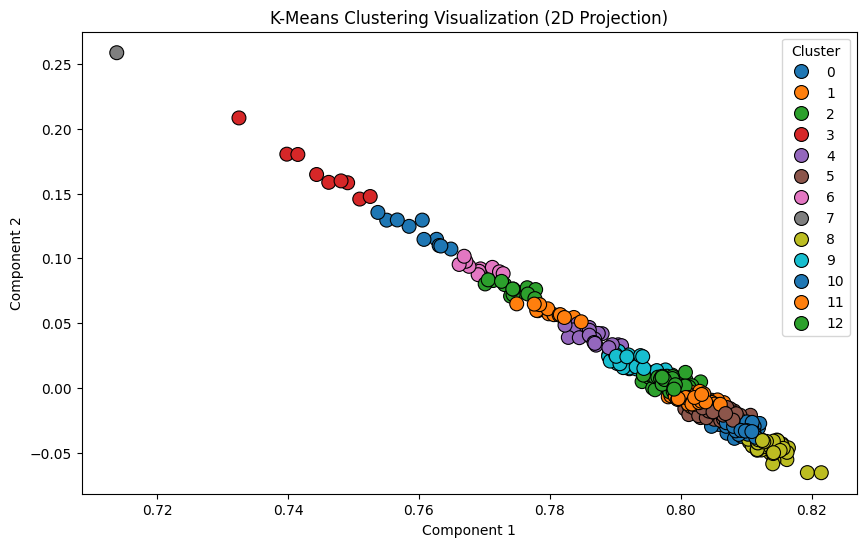

Finished displaying at: 2025-03-09 17:51:08 

Finished executing at: 2025-03-09 17:51:08 



In [1056]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [1058]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

# Open the file automatically
os.startfile("clustering_results.csv")

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,400,15,5,Skipgram,0.318198,0.072357
1,5,Word2Vec,400,15,10,Skipgram,0.238021,0.233598
2,5,Word2Vec,400,15,15,Skipgram,0.171440,0.513984
3,5,Word2Vec,400,15,20,Skipgram,0.212673,0.569047
4,5,Word2Vec,400,15,25,Skipgram,0.151177,0.777852
5,5,Word2Vec,400,15,30,Skipgram,0.130158,0.893334
6,9,Word2Vec,400,15,5,Skipgram,0.223303,0.046959
7,9,Word2Vec,400,15,10,Skipgram,0.174624,0.170183
8,9,Word2Vec,400,15,15,Skipgram,0.151613,0.353865
9,9,Word2Vec,400,15,20,Skipgram,0.132259,0.529954


In [1059]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,0.510029
1,9,0.408148
2,13,0.381476


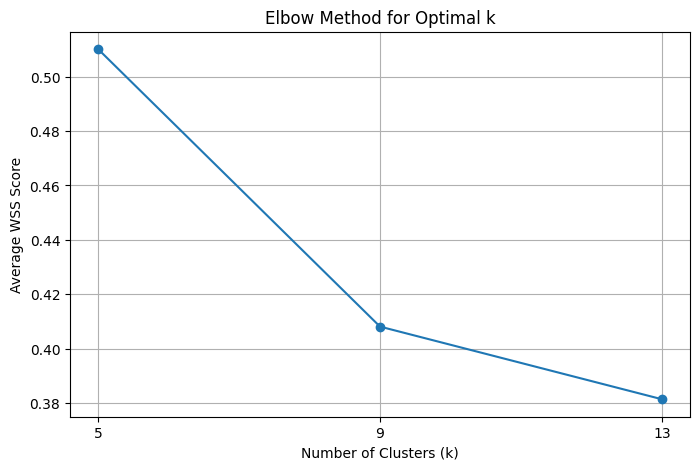

In [1060]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [1061]:
best_combination # vector size, window size, epoch

[5, 'word', 'Skipgram', 400, 15, 5, 0.3181979, 0.07235713303089142]